In [1]:
import pandas as pd
%matplotlib inline

In [2]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


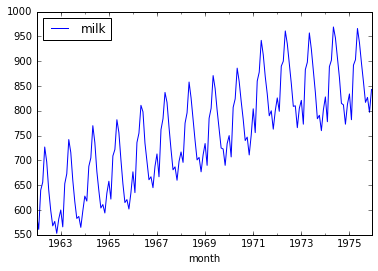

In [3]:
milk.plot()

In [4]:
import statsmodels.api as sm

In [5]:
sm.tsa.stattools.adfuller(milk.milk)

(-1.3038115874221323,
 0.62742670860303029,
 13L,
 154L,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [7]:
import calendar as cal

In [8]:
milk.index.year[:10]

array([1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962])

In [9]:
result = []
for x in milk.index:
    result.append(float(milk.get_value(x, 'milk')) / cal.monthrange(x.year, x.month)[1])

result[:10]

[19.0,
 20.035714285714285,
 20.64516129032258,
 21.866666666666667,
 23.451612903225808,
 23.233333333333334,
 20.64516129032258,
 19.322580645161292,
 18.933333333333334,
 18.612903225806452]

In [10]:
sum(result)

4166.326661899464

In [11]:
from matplotlib import pylab as plt

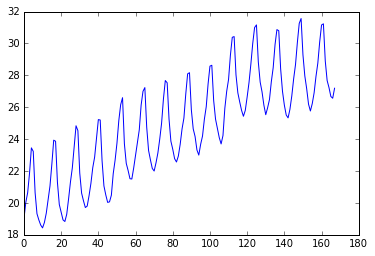

In [12]:
plt.plot(result)

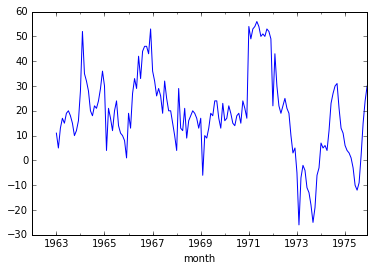

In [14]:
milk.daily_diff12 = milk.milk - milk.milk.shift(12)
milk.daily_diff12.plot()

In [16]:
sm.tsa.stattools.adfuller(milk.daily_diff12.dropna())

(-2.335419314359398,
 0.16079880527711349,
 12L,
 143L,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 983.7689056486297)

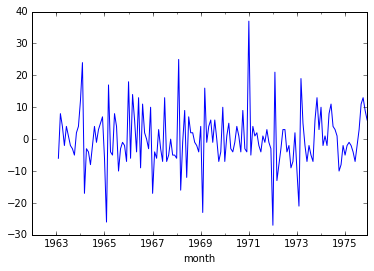

In [17]:
milk.daily_diff1 = milk.daily_diff12 - milk.daily_diff12.shift(1)
milk.daily_diff1.plot()

In [18]:
sm.tsa.stattools.adfuller(milk.daily_diff1.dropna())

(-5.0380022749219826,
 1.8654234318788481e-05,
 11L,
 143L,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 980.34203815384478)

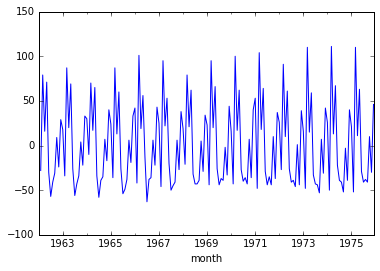

In [19]:
milk.diff1 = milk.milk - milk.milk.shift(1)
milk.diff1.plot()

In [20]:
sm.tsa.stattools.adfuller(milk.diff1.dropna())

(-3.0549955586530722,
 0.030068004001785484,
 14L,
 152L,
 {'1%': -3.474120870218417,
  '10%': -2.5770126333102494,
  '5%': -2.880749791423677},
 1107.6745114331075)

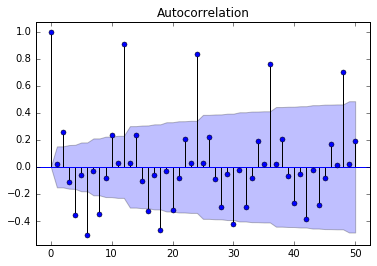

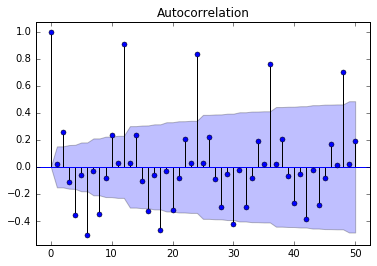

In [21]:
sm.graphics.tsa.plot_acf(milk.diff1.dropna().values.squeeze(), lags=50)

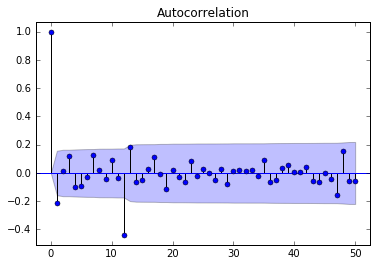

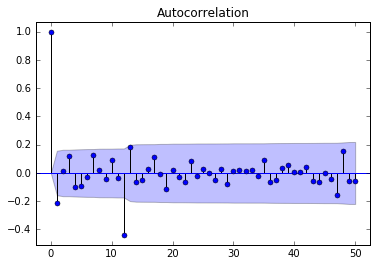

In [22]:
sm.graphics.tsa.plot_acf(milk.daily_diff1.dropna().values.squeeze(), lags=50)

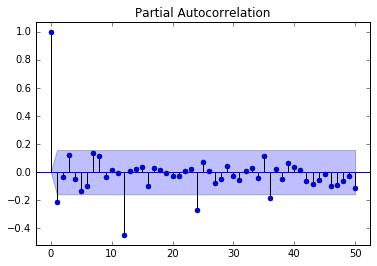

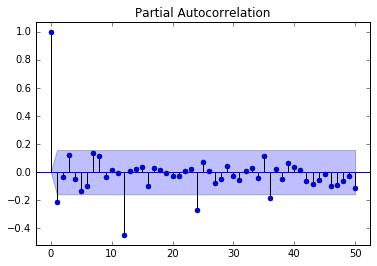

In [23]:
sm.graphics.tsa.plot_pacf(milk.daily_diff1.dropna().values.squeeze(), lags=50)